In [ ]:
%cd /contqent/drive/MyDrive/Colab Notebooks/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import *
from keras import backend as K
from keras.callbacks import *

# 외부


# dataset
from keras.datasets import fashion_mnist

# 출력시 ... 제거
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [1]:
%cd /content/drive/MyDrive/resource/

/content/drive/MyDrive/resource


In [7]:
model = tf.keras.models.load_model('ResNet-Layer34.h5')

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print ("number of training examples =", x_train.shape[0])
print ("number of test examples =", x_test.shape[0])
print ("X_train shape:", x_train.shape)
print ("Y_train shape:", y_train.shape)
print ("X_test shape:", x_test.shape)
print ("Y_test shape:", y_test.shape)

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [5]:
def extract_activationLayer(model, name):
  layers=[]

  for layer in model.layers:
    if name in layer.name:
        layers.append(layer.output)

  return layers

In [8]:
ac_layers = extract_activationLayer(model,"activation")

In [9]:
#K.function 구현
#K.fucntion을 통해 input을 통한 layer의 output value를 구할 수 있다.

kfunc = K.function([model.input],ac_layers[1:])

In [10]:
def simple_FM(input_data):
  act_output = kfunc(input_data)
  
  result = None

  #각 activation layer의 output 순회
  for tensor in act_output:
    tensor = np.float64(tensor)

    sixByone=None

    # 6*6*64에서 6*64접근/ 6번 순회
    # 결과로 36*1 배열 만들기
    for test in tensor[0]:
      a = np.mean(test,axis=1).reshape(-1,1)
  
      if sixByone is None:
        sixByone = a
      else:
        sixByone = np.concatenate((sixByone,a),axis=0)

    # 결과로 36*(layerLen)
    if result is None:
      result = sixByone
    else:
      result = np.concatenate((result,sixByone),axis=1)

  return result

In [11]:
def simple_postprocess(original,output,length):

  if original is None:
    return output
    
  oldWeight = (length-1)/length
  newWeight = 1 / length
  return (original*oldWeight) + (output*newWeight);

In [12]:
def BFM(i,x_train,y_train,FM_calcu,postProcess):

  iData = np.int32(np.where(y_train==i))

  bfm=None

  for idx,val in enumerate(iData[0]):
    
    input_data = np.float64(x_train[val]).reshape(1,28,28,1)
    
    output = FM_calcu(input_data)

    bfm = postProcess(bfm,output,idx+1)

  return bfm


In [26]:
def CFM(i,x_test,y_test,FM_calcu,postProcess):

  iData = np.int32(np.where(y_test==i))
  
  rfm=None
  wfm=None

  for idx,val in enumerate(iData[0]):
    
    model_predicted = model.predict(np.float64(x_test[val]).reshape(1,28,28,1), verbose=0).argmax(axis = 1)

    input_data = np.float64(x_test[val]).reshape(1,28,28,1)

    output=FM_calcu(input_data)

    if model_predicted[0]==y_test[val]:
      rfm = postProcess(rfm,output,idx+1)
    else:
      wfm = postProcess(wfm,output,idx+1)

  return rfm,wfm

In [ ]:
bfm = BFM(0,x_train,y_train,simple_FM,simple_postprocess)

In [ ]:
rfm,wfm = CFM(0,x_test,y_test,simple_FM,simple_postprocess)

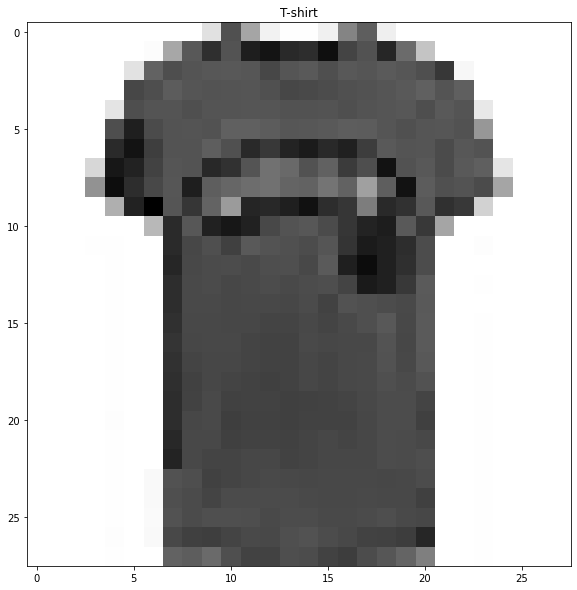

In [ ]:
image = x_test[np.int32(np.where(y_train==0))[0][0]]

plt.figure(figsize = (10, 10))
plt.imshow(image, cmap = 'Greys')
plt.title("T-shirt")
plt.show()

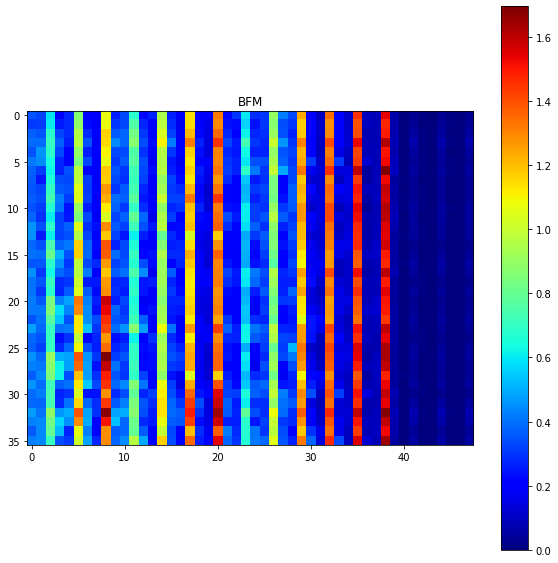

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(bfm, cmap = 'jet')
plt.colorbar()
plt.title("BFM")
plt.show()

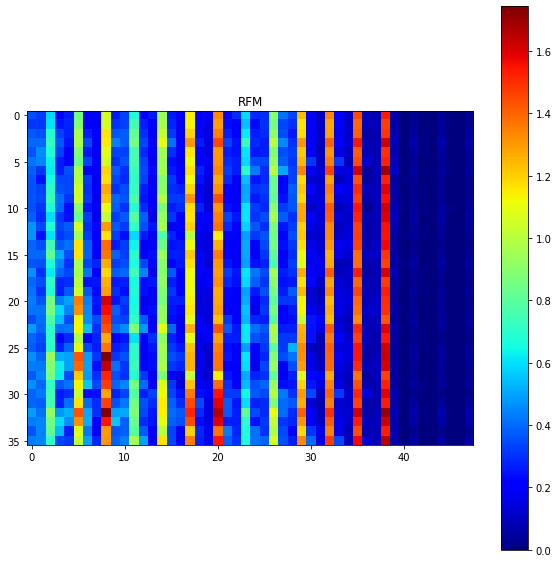

In [16]:
plt.figure(figsize = (10, 10))
plt.imshow(rfm, cmap = 'jet')
plt.colorbar()
plt.title("RFM")
plt.show()

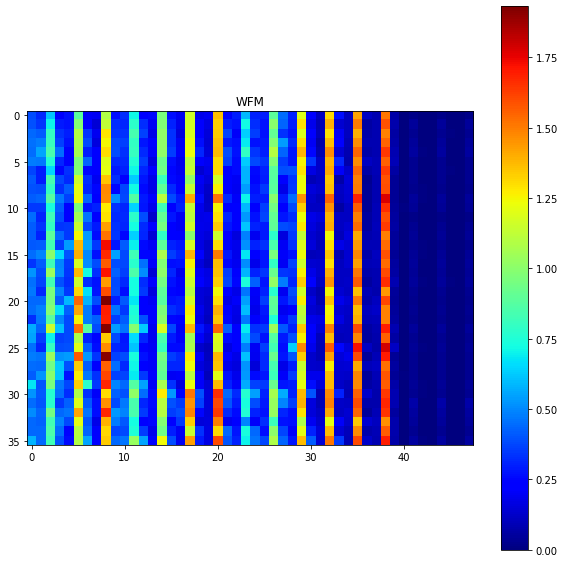

In [17]:
plt.figure(figsize = (10, 10))
plt.imshow(wfm, cmap = 'jet')
plt.colorbar()
plt.title("WFM")
plt.show()

In [27]:
bfm = BFM(1,x_train,y_train,simple_FM,simple_postprocess)

In [ ]:
rfm,wfm = CFM(1,x_test,y_test,simple_FM,simple_postprocess)

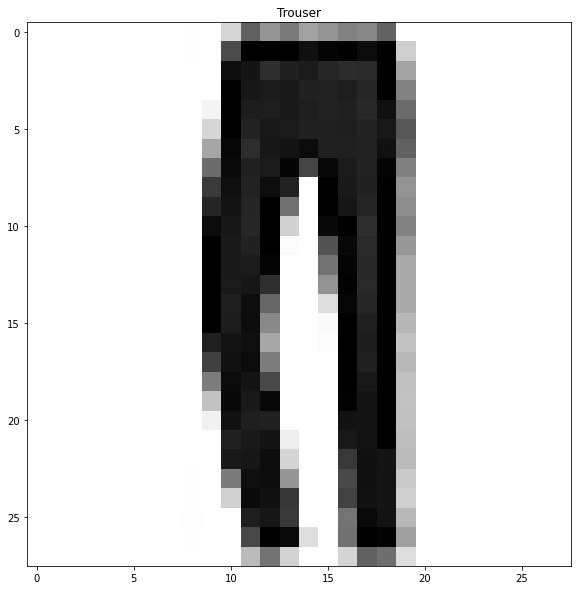

In [ ]:
image = x_test[np.int32(np.where(y_test==1))[0][0]]

plt.figure(figsize = (10, 10))
plt.imshow(image, cmap = 'Greys')
plt.title("Trouser")
plt.show()

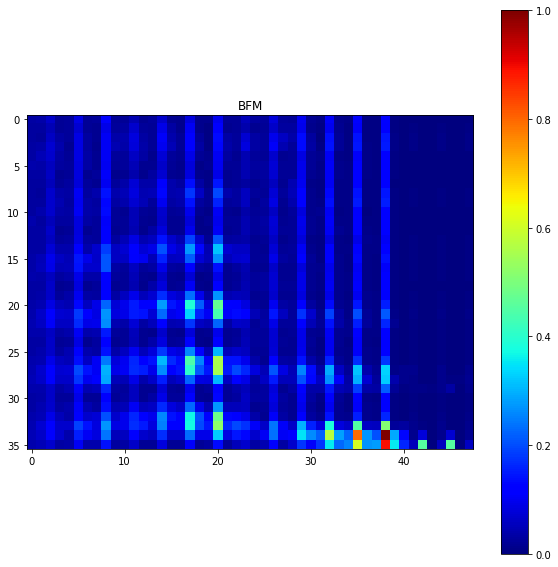

In [28]:
plt.figure(figsize = (10, 10))
bfm = bfm/bfm.max()
plt.imshow(bfm, cmap = 'jet')
plt.colorbar()
plt.title("BFM")
plt.show()

In [22]:
rfm = rfm/rfm.max()

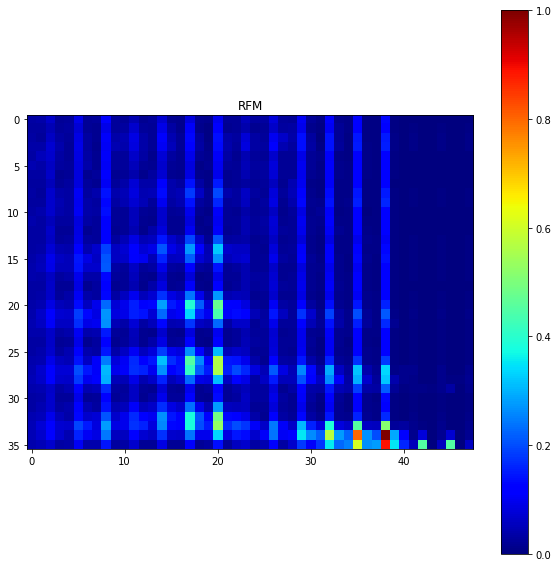

In [23]:
plt.figure(figsize = (10, 10))
plt.imshow(rfm, cmap = 'jet')
plt.colorbar()
plt.title("RFM")
plt.show()

In [24]:
wfm = wfm / wfm.max()

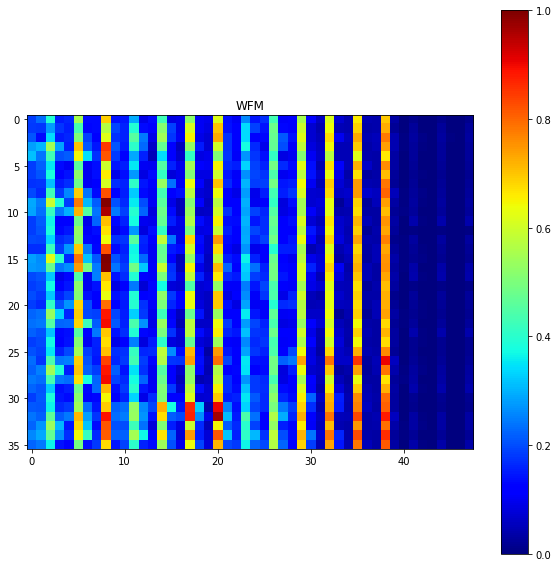

In [25]:
plt.figure(figsize = (10, 10))
plt.imshow(wfm, cmap = 'jet')
plt.colorbar()
plt.title("WFM")
plt.show()